In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [2]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
 
data = pd.read_csv('../ml_data/housing.data',
                   sep=' +', engine='python', header=None, 
                   names=cols)

In [3]:
X = data.drop('MEDV', axis=1)
y = data['MEDV'].values

In [15]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X)

StandardScaler()

In [19]:
X = scaler.transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
df_ridge = pd.DataFrame({
    'param_value' : np.arange(0.1, 10.1, 0.1),
    'r2_results' : 0.,
    'number_of_features' : 0
})

In [72]:
for i in range(df_ridge.shape[0]):
    alpha = df.at[i, 'param_value']
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    df_ridge.at[i, 'r2_results'] = r2_score(y_test, model.predict(X_test))
    df_ridge.at[i, 'number_of_features'] = len(model.coef_[model.coef_ > 0])

In [73]:
lasso_df = pd.DataFrame({'param_value': np.arange(start = 0.1, stop = 10.1, step = 0.1),
                      'r2_result': 0.,
                      'number_of_features':0})

In [74]:
for i in range(lasso_df.shape[0]):
    
    alpha = lasso_df.at[i, 'param_value']
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    lasso_df.at[i, 'r2_result'] = r2_score(y_test, model.predict(X_test))
    lasso_df.at[i, 'number_of_features'] = len(model.coef_[ model.coef_ > 0])

In [75]:
elastic_df = pd.DataFrame({
    'param_value' : np.arange(0.1, 10.1, 0.1),
    'r2_result' : 0.,
    'number_of_features' : 0
})

In [76]:
for i in range(elastic_df.shape[0]):
    alpha = elastic_df.at[i, 'param_value']
    model = ElasticNet(alpha=alpha)
    model.fit(X_train, y_train)
    elastic_df.at[i, 'r2_result'] = r2_score(y_test, model.predict(X_test))
    elastic_df.at[i, 'number_of_features'] = len(model.coef_[model.coef_ > 0])

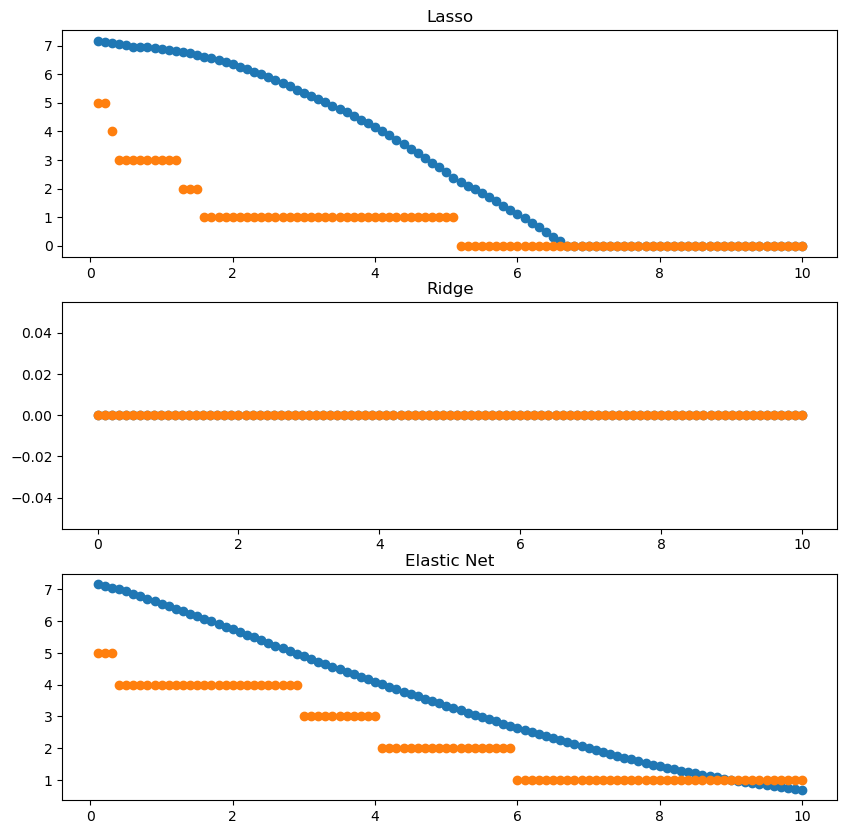

In [102]:
fig, axs = plt.subplots(3, figsize=(10,10))
axs[0].title.set_text('Lasso')
axs[0].scatter(x = lasso_df['param_value'], y=lasso_df['r2_result']*10)
axs[0].scatter(x = lasso_df['param_value'], y=lasso_df['number_of_features'])
axs[1].title.set_text('Ridge')
axs[1].scatter(x = ridge_df['param_value'], y=ridge_df['r2_result']*10)
axs[1].scatter(x = ridge_df['param_value'], y=ridge_df['number_of_features'])
axs[2].title.set_text('Elastic Net')
axs[2].scatter(x = elastic_df['param_value'], y=elastic_df['r2_result']*10)
axs[2].scatter(x = elastic_df['param_value'], y=elastic_df['number_of_features'])